*CIDER* [Classification of Intrinsically Disordered Ensemble Regions](http://pappulab.wustl.edu/CIDER) is a web-server from the Pappu lab for calculating various properties of a disordered sequence. CIDER’s calculations are carried out by a backend app, called [*localCIDER*](http://pappulab.github.io/localCIDER/). 

*CIDER* is useful if you want to quickly calculate some parameters on the fly. However, for doing a large number of sequences, they recommend using *localCIDER* to carry out the computation locally.

Here, I show an example of how to use localCIDER. For more details documentation,  check the *localCIDER* documentation.

In [1]:
# automatically plot inline with matplotlib
%pylab inline 
from localcider.sequenceParameters import SequenceParameters # import localcider
from IPython.core.display import display, HTML

Populating the interactive namespace from numpy and matplotlib


We'll work with the N6 sequence since I happen to have the fasta file for it on hand. The first step is putting the fasta file in the same folder as this jupyter notebook. Then, localCIDER can open and read the sequence.

In [52]:
seqob = SequenceParameters(sequenceFile="N6seq.fasta") # read in from fasta file
# Alternatively, you can uncomment the line below if you want to directly type in the sequence string.
#seqob = SequenceParameters('MGCGSGASENLYFQGASTRLSFTSVGSITSGYSQSSQVFGRSAYSGLQSSSYLMSARSFPAYYNSHVQEEQTEVEETIEATKAEEAKDEPPSEGEAEEEEKEKEEGEEEEGAEEEEAAKDESEDTKEEEEGGEGEEEDTKESEEEEKKEESAGEEQVAKKKDGGGSCG') # read in from fasta file
display(HTML(seqob.get_HTMLColorString())) # Display a pretty version of the sequence

Once you have the sequence loaded into the SequenceParameters class, you have access to a lot of plots and information. You can get all the options and information by writing help(seqob) or checking the localCIDER documentation page. Note: I've noticed a lot of spelling mistakes in the documentation.

But, first, we're interested in all of the automatic plotting options, so let's take a look at them.

In [49]:
# This gets all of the automatic plotting options
plot_options = [op for op in dir(seqob) if 'show' in op] # automatic plotting options include show
print(plot_options)

['show_linearComplexity', 'show_linearFCR', 'show_linearHydropathy', 'show_linearNCPR', 'show_linearSigma', 'show_phaseDiagramPlot', 'show_uverskyPlot']


findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


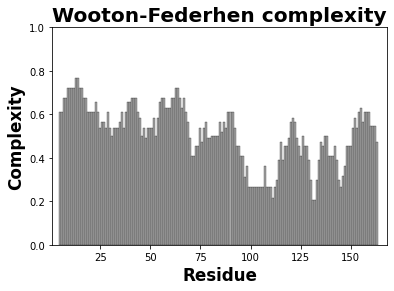

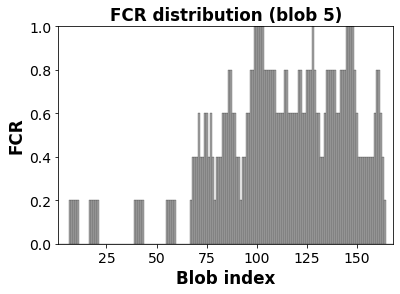

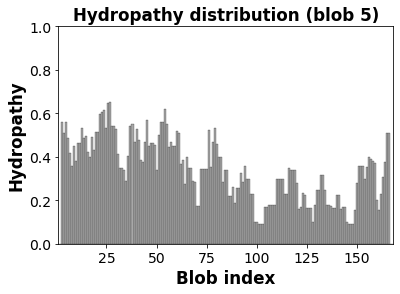

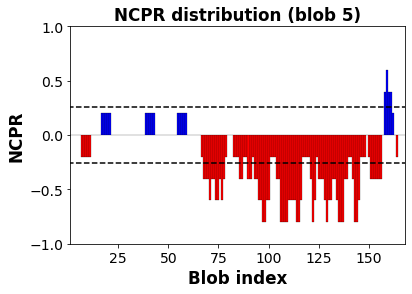

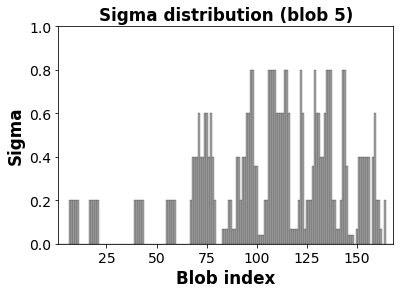

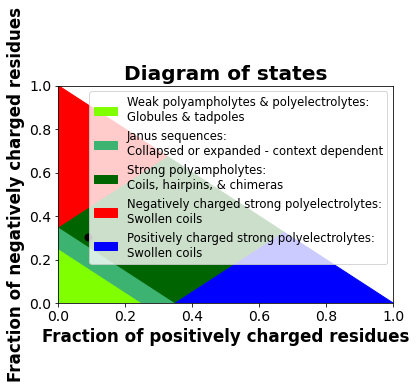

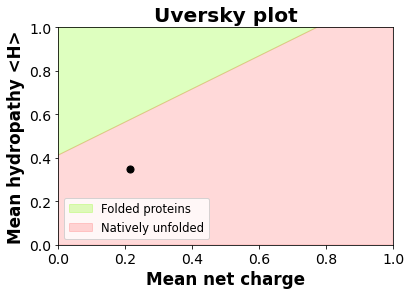

In [50]:
# This calls all the automatic plotting options
for op in plot_options:
    attr = getattr(seqob,op)
    attr()

If you don't like the default outputs for the figurse (like me), you can get the matplotlib figure object and modify it.

Text(0, 0.5, 'Net charge \nper residue ($e^{-1}$)')

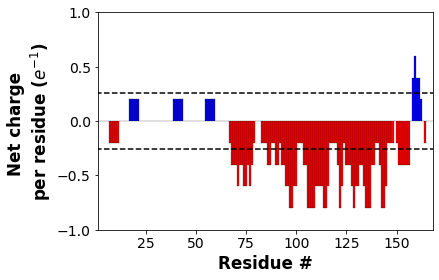

In [51]:
# Note this is still a 5 residue rolling average
fig = seqob.show_linearNCPR(getFig=True) # get the figure
ax = fig.gca() # get current axis
ax.set_title('')
ax.set_xlabel('Residue #')
ax.set_ylabel('Net charge \nper residue ($e^{-1}$)')

localCIDER also gives you a bunch of information that it doesn't automatically plot.

In [40]:
# This gets all of the automatic plotting options
plot_options = [op for op in dir(seqob) if op.startswith('get')] # automatic plotting options include show
print(plot_options)

['get_FCR', 'get_HTMLColorString', 'get_NCPR', 'get_Omega', 'get_Omega_sequence', 'get_PPII_propensity', 'get_SCD', 'get_all_phosphorylatable_sites', 'get_amino_acid_fractions', 'get_countNeg', 'get_countNeut', 'get_countPos', 'get_delta', 'get_deltaMax', 'get_fraction_disorder_promoting', 'get_fraction_expanding', 'get_fraction_negative', 'get_fraction_positive', 'get_full_phosphostatus_kappa_distribution', 'get_isoelectric_point', 'get_kappa', 'get_kappa_X', 'get_kappa_after_phosphorylation', 'get_length', 'get_linear_FCR', 'get_linear_NCPR', 'get_linear_complexity', 'get_linear_hydropathy', 'get_linear_sequence_composition', 'get_linear_sigma', 'get_mean_hydropathy', 'get_mean_net_charge', 'get_molecular_weight', 'get_phasePlotRegion', 'get_phosphosequence', 'get_phosphosites', 'get_reduced_alphabet_sequence', 'get_sequence', 'get_shuffled_sequence', 'get_uversky_hydropathy']


From this extra information, you can do things like plot all of the charged, polar, and hydrophobic residues.

Text(0, 0.5, 'Average type \nper 5 residues')

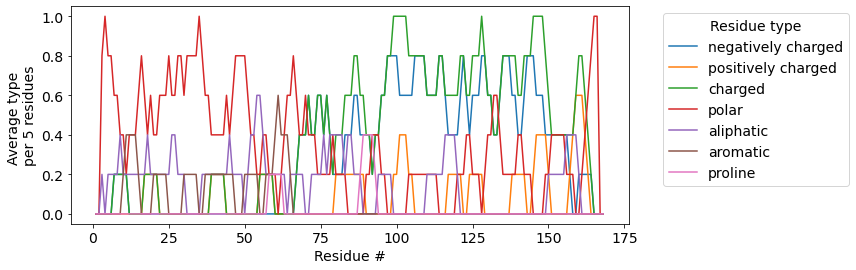

In [38]:
# Note this is a 5 residue rolling average
fig,ax = plt.subplots(figsize = (10,4))
labels = ['negatively charged', 'positively charged', 'charged', 'polar', 'aliphatic', 'aromatic', 'proline']
position, residue_type = seqob.get_linear_sequence_composition(blobLen=5)
for group,label in zip(residue_type,labels):
    ax.plot(position,group,label=label)
ax.legend(title= 'Residue type',bbox_to_anchor = (1.05,1))
ax.set_xlabel('Residue #')
ax.set_ylabel('Average type \nper 5 residues')

If you want more examples, let me know and I'll play around with it some more.